C:\Users\Gryffindor\AppData\Local\Temp\ipykernel_14788\524166352.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, x='diagnosis', palette='coolwarm')


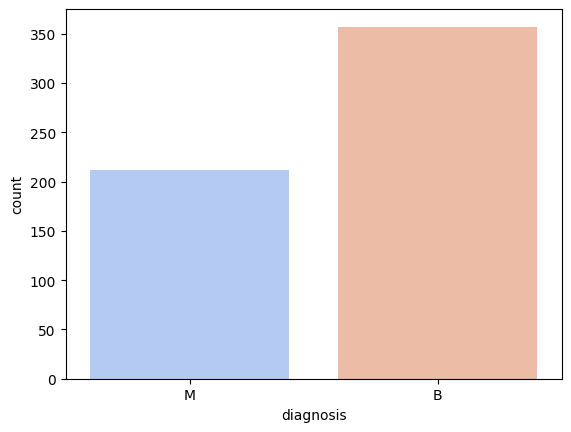

SVM Accuracy: 0.9210526315789473
Random Forest Accuracy: 0.9736842105263158
SVM Confusion Matrix:
 [[70  2]
 [ 7 35]]
Random Forest Confusion Matrix:
 [[72  0]
 [ 3 39]]

SVM Classification Report:
               precision    recall  f1-score   support

           B       0.91      0.97      0.94        72
           M       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114

Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



C:\Users\Gryffindor\AppData\Local\Temp\ipykernel_14788\524166352.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[indics], y=feature_names[indics], palette='viridis')


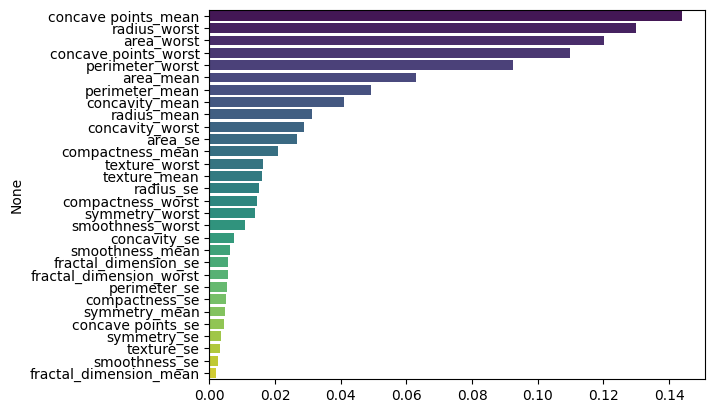

C:\Users\Gryffindor\AppData\Local\Temp\ipykernel_14788\524166352.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance[indics], y=feature_names[indics], palette='viridis')


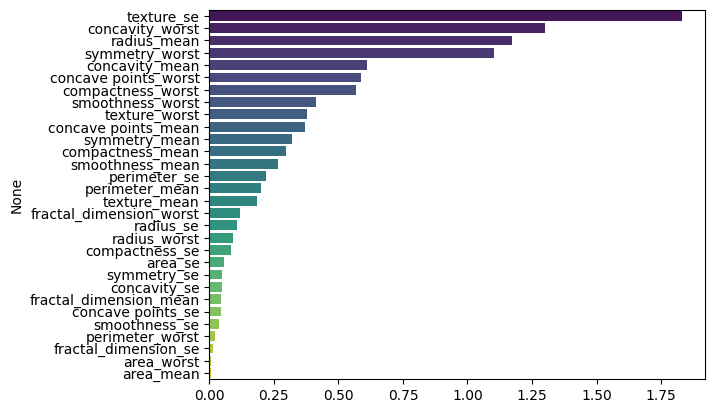

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('BreastCancer.csv')

df = df.fillna(df.mean(numeric_only=True))

lr = LabelEncoder()
df['target'] = lr.fit_transform(df['diagnosis'])
target_names = list(lr.classes_)

X = df.drop(columns=['id', 'diagnosis', 'target'])
y = df['target']
feature_names = X.columns

sns.countplot(df, x='diagnosis', palette='coolwarm')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=target_names))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=target_names))


importance = np.abs(rf_model.feature_importances_)
indics = np.argsort(importance)[::-1]

sns.barplot(x=importance[indics], y=feature_names[indics], palette='viridis')
plt.show()

importance = np.abs(svm_model.coef_).flatten()
indics = np.argsort(importance)[::-1]

sns.barplot(x=importance[indics], y=feature_names[indics], palette='viridis')
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv('BreastCancer.csv')
display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'Col: {col} -> {df[col].dtype}')

Col: diagnosis -> object


C:\Users\Gryffindor\AppData\Local\Temp\ipykernel_1816\456920721.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette='coolwarm')


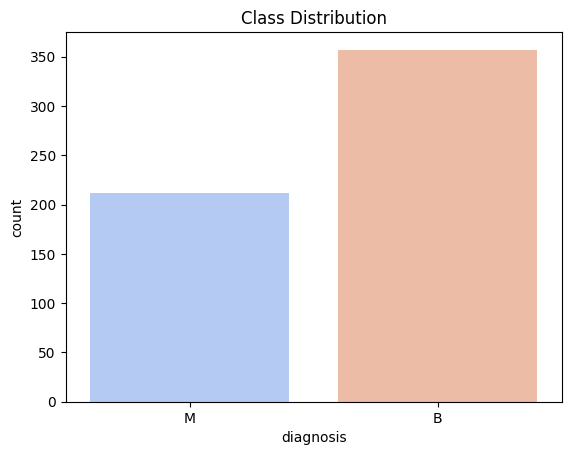

In [5]:
df = df.fillna(df.mean(numeric_only=True))

le = LabelEncoder()
df['target'] = le.fit_transform(df['diagnosis'])
target_names = list(le.classes_)

X = df.drop(columns=['id', 'diagnosis', 'target'], errors='ignore')
y = df['target']
feature_names = X.columns

sns.countplot(data=df, x='diagnosis', palette='coolwarm')
plt.title('Class Distribution')
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

print("\nSVM Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=target_names))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=target_names))


SVM Accuracy: 0.9210526315789473
Random Forest Accuracy: 0.9736842105263158
SVM Confusion Matrix:
 [[70  2]
 [ 7 35]]
Random Forest Confusion Matrix:
 [[72  0]
 [ 3 39]]

SVM Classification Report:
               precision    recall  f1-score   support

           B       0.91      0.97      0.94        72
           M       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114

Random Forest Classification Report:
               precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



C:\Users\Gryffindor\AppData\Local\Temp\ipykernel_1816\3559879467.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances[indices], y=feature_names[indices], palette='viridis')


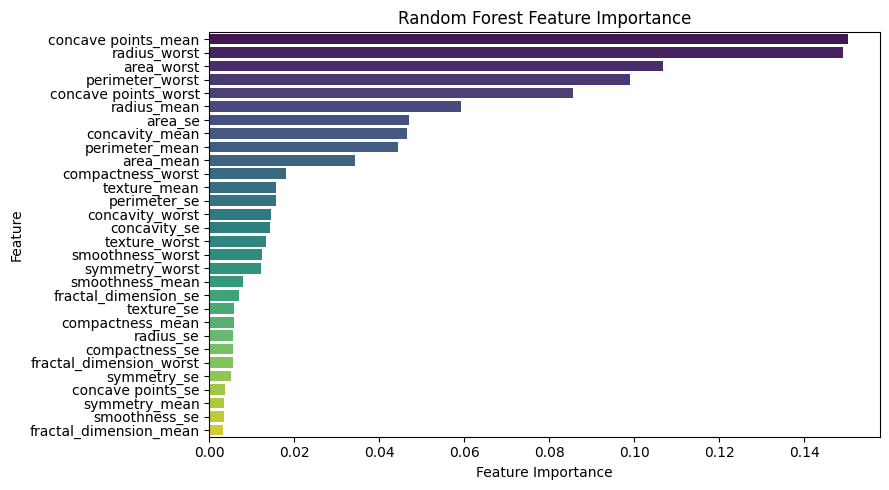

In [7]:
rf_importances = np.abs(rf_model.feature_importances_)
indices = np.argsort(rf_importances)[::-1]

plt.figure(figsize=(9, 5))
sns.barplot(x=rf_importances[indices], y=feature_names[indices], palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


C:\Users\Gryffindor\AppData\Local\Temp\ipykernel_1816\1383970044.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=svm_importances[indices_svm], y=feature_names[indices_svm], palette='magma')


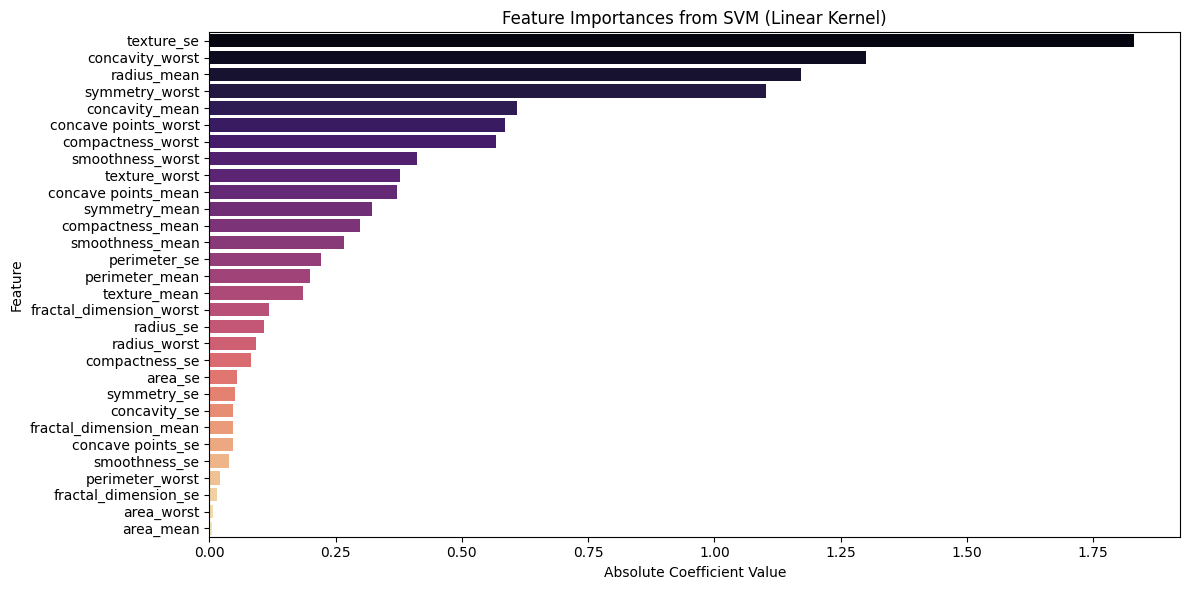

In [8]:
svm_importances = np.abs(svm_model.coef_).flatten()
indices_svm = np.argsort(svm_importances)[::-1] 

plt.figure(figsize=(12, 6))
plt.title("Feature Importances from SVM (Linear Kernel)")
sns.barplot(x=svm_importances[indices_svm], y=feature_names[indices_svm], palette='magma')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
plt.show()